# LT_01_Notebook_for_EarthCube_MagIC_database_and_open_science.ipynb


## Author(s)
- Author1 = {"name": "Lisa Tauxe", "affiliation": "Scripps Institution of Oceanography", "email": "ltauxe@ucsd.edu", "orcid": "0000-0002-4837-8200"}
- Author2 = {"name": "Rupert Minnett", "affiliation": "Cogense, Inc.", "email": "rminnett@cogense.com", "orcid": "0000-0002-9000-2100"}
- Author3 = {"name": "Nick Jarboe", "affiliation": "Oregon State University", "email": "njarboe@ucsd.edu", "orcid": "0000-0003-1465-9394"}
- Author4 = {"name": "Catherine Constable", "affiliation": "Scripps Institution of Oceanography", "email": "cconstable@ucsd.edu", "orcid": "0000-0003-4534-4977"}
- Author5 = {"name": "Anthony Koppers", "affiliation": "Oregon State University, "email": "Oregon State University, "orcid": "0000-0002-8136-5372"}



## Purpose

This notebook demonstrates how to access data in the MagIC open source database at http://earthref.org/MagIC
The MagIC database (Magnetics Information Consortium) is a database that allows magnetic measurement data of rocks and archaeological artifacts to be Findable, Accessible, Interoperable and Re-usable. It is housed at https://earthref.org/MagIC. Data can be accessed either through a web browser or through API queries, the most direct of which connects a dataset to the DOI of the publication using Python code that is part of the PmagPy software package (https://github.org/PmagPy/PmagPy). Data can therefore be downloaded, unpacked, re-analyzed or imaged and then repackaged and uploaded back into a private workspace of the user. Jupyter notebooks can then be attached to a new publication and serve as important supplemental material for publication, making the data and the analysis thereof transparent and reproducible. We will illustrate the use of Jupyter notebooks in connection with FAIR data practices in the rock and paleomagnetic world.

This notebook is developed for Python 3.7+, and can be explored through the jupyterhub site at https://jupyterhub.earthref.org after creating an account using your ORCID.  


## Technical contributions

- Paleomagnetic data published on the MagIC website and linked to a DOI can be downloaded from the database using an API. 
- The PmagPy python software package imported in the notebook and installed on the jupyterhub website can be used to unpack and re-analyze data in the database, demonstrating the benefit of FAIR principles. 


## Methodology
- install useful Python modules
- install the PmagPy software package
- download a dataset from MagIC
- re-analyze the data using PmagPy plotting and analysis functions


## Results
This notebook illustrates how open source databases can be accessed and used to further the goals of open science. 

## Funding
Include references to awards that supported this research. Add as many award references as you need.

- Award1 = {"agency": "US National Science Foundation", "award_code": "1822336", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=1822336"}
- Award1 = {"agency": "US National Science Foundation", "award_code": "2126298", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=2126298"}
## Keywords

keywords=["FAIR", "Open Science", "MagIC database", "PmagPy software package", "paleomagnetism"]

## Citation
 Tauxe et al., 2022,  EarthCube Notebook for 2022 meeting. Accessed XX/XX/XXXX at https://github.com/PmagPy/Earthcube-notebooks


## Acknowledgements 

We thank  members of the MagIC/FIESTA database team Nick Swanson-Hysell and Christeanne Santos for help in maintaining the PmagPy software package.  

The template is licensed under a <a href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License.</a>

# Setup

## Access of the notebook:

This notebook can be run either using Binder on github, through the earthref jupyterhub site, or on a local desktop.  

- github:  Go to https://github.com/PmagPy/Earthcube-notebooks and click on LT01_Notebook_for_EarthCube_MagIC_database_and_open_science.ipynb.  Follow the instructions.  

- Go to the jupyter-hub website at https://jupyterhub.earthref.org/ to run this online.  You will have to log in to the earthref website with your ORCID, but then you will have a workspace to use this and the other PmagPy jupyter notebooks.

- Alternatively, you can  put this notebook in a working directory on your own laptop.  You would then have to install Python and the  PmagPy software package on your computer (if you have not already done so).  The instructions for that are here: https://earthref.org/PmagPy/cookbook/.  Follow  the instructions for  "Full PmagPy install and update" through section 1.4 (Quickstart with PmagPy notebooks).  This notebook is in  the collection of PmagPy notebooks. 

- Click on the cell below and then click on 'Run' from the menu above to import the desired functionality






## Library import
Import all the required Python libraries.




In [1]:
# Import more useful modules
import numpy as np # the fabulous NumPy package
import pandas as pd # and  Pandas for data wrangling
import os # some useful operating system functions
from importlib import reload # for reloading module if they get changed after initial import
from IPython.display import Image
import imageio # for making animations

## Local library import

- import the special PmagPy and mapping modules
- create a directory for use in this notebook

In [3]:
# Import PmagPy modules
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

# Import plotting modules
has_cartopy, Cartopy = pmag.import_cartopy() # import mapping module, if it is available
import matplotlib.pyplot as plt # our plotting buddy
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 



dirs=os.listdir() # get a list of directories in this one
if 'MagIC_for_earthcube' not in dirs:
    os.mkdir("MagIC_for_earthcube")


# Parameter definitions

-after installation of PmagPy software, set up the directory structure for this notebook

- Define path, desired DOI for downloading data from MagIC and a placeholder filename. 


In [1]:
dir_path='MagIC_for_earthcube' # set the path to the  working directory
reference_doi='10.1029/2019GC008479' # Behar et al. (2019)
magic_contribution='magic_contribution.txt' # temporary name for contribution prior to unpacking




# Data import
Retrieve all the required data for the analysis.

We will be using the data from this reference: 

Behar, N., Shaar, R., Tauxe, L., Asefaw, H., Ebert, Y., Heimann, A., Koppers, A.A.P., and Ron, H., Paleomagnetic study of the Plio-Pleistocene Golan Heights volcanic field, Israel: confirmation of the GAD field hypothesis,  Geophys., Geochem. Geosyst., 20,  doi: 10.1029/2019GC008479, 2019. 

Steps for data import:
- download the data from the database using the reference DOI
- move the data to the directory
- unpack the data into MagIC formatted tab delimited files. 

For help on all functions use:
help(ModuleName.FunctionName)

example:

help(ipmag.download_magic_from_doi)


In [5]:
help(ipmag.download_magic_from_doi)

Help on function download_magic_from_doi in module pmagpy.ipmag:

download_magic_from_doi(doi)
    Download a public contribution matching the provided DOI
    from earthref.org/MagIC.
    
    Parameters
    ----------
    doi : str
        DOI for a MagIC
    
    Returns
    ---------
    result : bool
    message : str
        Error message if download didn't succeed



In [6]:
ipmag.download_magic_from_doi(reference_doi)
os.rename(magic_contribution, dir_path+'/'+magic_contribution)
ipmag.download_magic(magic_contribution,dir_path=dir_path,print_progress=False)

16961/magic_contribution_16961.txt extracted to magic_contribution.txt 

1  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/contribution.txt
1  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/locations.txt
91  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/sites.txt
611  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/samples.txt
676  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/specimens.txt
6297  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/measurements.txt
2  records written to file  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/cr

True

# Data processing and analysis

We will look at two examples of reuse of the data from our study.  The first will make an equal area projection of all the directions found in the study and the second will look at the data after transformation to virtual geomagnetic pole positions.     

For more information on Paleomagnetism, check out the open source textbook hosted by MagIC at: 
https://earthref.org/MagIC/books/Tauxe/Essentials/

For details about equal area projections, see: https://earthref.org/MagIC/books/Tauxe/Essentials/#x1-227000B

For details about virtual geomagnetic poles, see: https://earthref.org/MagIC/books/Tauxe/Essentials/#x1-200002.4.2



### MagIC formatted files

The Magnetics Information Consortium (MagIC), hosted at http://earthref.org/MagIC is a database that serves as a Findable, Accessible, Interoperable, Reusable (FAIR) archive for paleomagnetic and rock magnetic data. Its data model is fully described here: [https://www2.earthref.org/MagIC/data-models/3.0](https://www2.earthref.org/MagIC/data-models/3.0). Each contribution is associated with a publication via the DOI.  There are nine data tables:

- contribution: metadata of the associated publication.
- locations: metadata for locations, which are groups of sites (e.g., stratigraphic section, region, etc.)
- sites: metadata and derived data at the site level (units with a common expectation)
- samples: metadata and derived data at the sample level.
- specimens: metadata and derived data at the specimen level.
- criteria: criteria by which data are deemed acceptable
- ages: ages and metadata for sites/samples/specimens
- images: associated images and plots.  



MagIC .txt files all have  the delimiter (tab) and the type of table in the first line and the column headers in the second line.  

To read in the site level data into a pandas dataframe and look at the first few lines, use the following syntax:



In [13]:
df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
df.head()

,age,age_high,age_low,age_unit,citations,criteria,dir_alpha95,dir_comp_name,dir_dec,dir_inc,...,result_quality,result_type,samples,site,software_packages,specimens,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,0.6798,0.6798,0.6798,Ma,This study,ACCEPT,4.7,Fit 1,350.0,37.2,...,g,i,GH01A:GH01B:GH01C:GH01D:GH01H:GH01M,GH01,pmagpy-3.16.0: demag_gui.v.3.0,GH01A1:GH01B1:GH01B2:GH01C1:GH01D1:GH01H1:GH01M1,5.5,3.2,74.8,254.1
1,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.3,Fit 1,349.7,37.2,...,g,i,GH02A:GH02C:GH02D:GH02E:GH02F:GH02G,GH02,pmagpy-3.16.0: demag_gui.v.3.0,GH02A1:GH02C1:GH02D1:GH02E1:GH02E2:GH02F1:GH02...,2.7,1.6,74.7,255.0
2,1.1115,1.1115,1.1115,Ma,This study,ACCEPT,2.3,Fit 1,157.0,-56.9,...,g,i,GH03A:GH03B:GH03C:GH03D:GH03E:GH03G:GH03H,GH03,pmagpy-3.16.0: demag_gui.v.3.0,GH03A1:GH03B1:GH03C1:GH03C2:GH03D1:GH03E1:GH03...,3.3,2.4,-70.8,145.5
3,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.1,Fit 1,175.1,-58.0,...,g,i,GH04A:GH04B:GH04C:GH04D:GH04E:GH04F:GH04G:GH04H,GH04,pmagpy-3.16.0: demag_gui.v.3.0,GH04A1:GH04B1:GH04C1:GH04D1:GH04E1:GH04E2:GH04...,3.1,2.3,-83.1,181.8
4,1.1196,1.1196,1.1196,Ma,This study,ACCEPT,2.8,Fit 1,181.0,-56.8,...,g,i,GH05A:GH05B:GH05D:GH05G:GH05H:GH05I:GH05K:GH05L,GH05,pmagpy-3.16.0: demag_gui.v.3.0,GH05A1:GH05B1:GH05D1:GH05G1:GH05H1:GH05H2:GH05...,4.1,2.9,-85.6,226.0


### Equal area projections of directional data.
We will plot the Plio-Pleistocene magnetic field directional data in the Behar et al. (2019) paper in an equal area projection using the PmagPy function ipmag.eqarea_magic().  


In [7]:
help(ipmag.eqarea_magic)

Help on function eqarea_magic in module pmagpy.ipmag:

eqarea_magic(in_file='sites.txt', dir_path='.', input_dir_path='', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', plot_by='all', crd='g', ignore_tilt=False, save_plots=True, fmt='svg', contour=False, color_map='coolwarm', plot_ell='', n_plots=5, interactive=False, contribution=None, source_table='sites', image_records=False)
    makes equal area projections from declination/inclination data
    
    Parameters
    ----------
    in_file : str, default "sites.txt"
    dir_path : str
        output directory, default "."
    input_dir_path : str
        input file directory (if different from dir_path), default ""
    spec_file : str
        input specimen file name, default "specimens.txt"
    samp_file: str
        input sample file name, default "samples.txt"
    site_file : str
        input site file name, default "sites.txt"
    loc_file : str
        input location file nam

### essential parameters:
- dir_path was set previously and all other parameters are the defaults, so we can just run this program. 


-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org
91  sites records read in
All


(True, [])

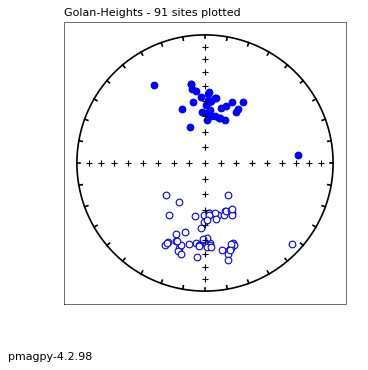

In [8]:
ipmag.eqarea_magic(dir_path=dir_path,save_plots=False)

### Saving plots
- to save the plots, set save_plots to True and your prefered format. 
- you can download the resulting png file (or find it in your project directory if running locally).  

In [9]:
ipmag.eqarea_magic(dir_path=dir_path,save_plots=True,fmt='png')

91  sites records read in
1  saved in  /Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/all_Golan-Heights_g_eqarea.png


(True,
 ['/Users/ltauxe/Documents/writing_stuff/Notebook_GIT/EarthCube-notebooks/MagIC_for_earthcube/all_Golan-Heights_g_eqarea.png'])

### Map of equivalent VGPs 
We will plot the directional data from the last example after transformation to virtual geomagnetic poles (VGPs), using the PmagPy function ipmag.vgpmap_magic().  



In [35]:
# get help message for vgpmap_magic
help(ipmag.vgpmap_magic)

Help on function vgpmap_magic in module pmagpy.ipmag:

vgpmap_magic(dir_path='.', results_file='sites.txt', crd='', sym='ro', size=8, rsym='g^', rsize=8, fmt='pdf', res='c', proj='ortho', flip=False, anti=False, fancy=False, ell=False, ages=False, lat_0=0, lon_0=0, save_plots=True, interactive=False, contribution=None, image_records=False)
    makes a map of vgps and a95/dp,dm for site means in a sites table
    
    Parameters
    ----------
    dir_path : str, default "."
        input directory path
    results_file : str, default "sites.txt"
        name of MagIC format sites file
    crd : str, default ""
       coordinate system [g, t] (geographic, tilt_corrected)
    sym : str, default "ro"
        symbol color and shape, default red circles
        (see matplotlib documentation for more color/shape options)
    size : int, default 8
        symbol size
    rsym : str, default "g^"
        symbol for plotting reverse poles
        (see matplotlib documentation for more color/sha

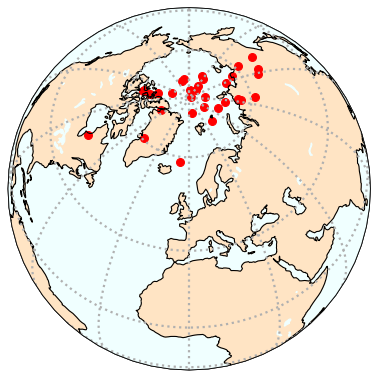

In [44]:
reload(ipmag)
ipmag.vgpmap_magic(dir_path=dir_path,size=50,flip=False,save_plots=False,lat_0=60,rsym='b^',rsize=50,fmt='png')

# Next steps:
- Try out other jupyter notebooks within the PmagPy distribution to learn the full functionality of the package
- Become a PmagPy developer! 

# References
List relevant references.

1. Behar, N., Shaar, R., Tauxe, L., Asefaw, H., Ebert, Y., Heimann, A., Koppers, A.A.P., and Ron, H., Paleomagnetic study of the Plio-Pleistocene Golan Heights volcanic field, Israel: confirmation of the GAD field hypothesis,  Geophys., Geochem. Geosyst., 20,  doi: 10.1029/2019GC008479, 2019. 


2. MagIC website:  https://www2.earthref.org/MagIC

3. Textbook for paleomagnetism: https://earthref.org/MagIC/books/Tauxe/Essentials/

4. PmagPy installation instructions:  https://earthref.org/PmagPy/cookbook/

5. Course in Python for Earth Science Students: https://github.com/ltauxe/Python-for-Earth-Science-Students

6. PmagPy citation:  Tauxe, L., R. Shaar, L. Jonestrask, N. L. Swanson-Hysell, R. Minnett, A. A. P. Koppers, C. G. Constable, N. Jarboe, K. Gaastra, and L. Fairchild (2016), PmagPy: Software package for paleomagnetic data analysis and a bridge to the Magnetics Information Consortium (MagIC) Database, Geochem. Geophys. Geosyst., 17, https://doi.org/10.1002/2016GC006307.


